# Homework2 - Data from the web
#### Group member: Shengzhao LEI - Tao SUN - Xiangzhe MENG

In [1]:
%matplotlib inline
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## 1. QS world universities ranking 2018

### 1.1 Get data

Import the main data from the url below.

In [2]:
URL = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508078320231'

In [3]:
r = requests.get(URL)
page_body = r.json()

In [4]:
list_rankings = page_body["data"]

Display all attributes' names.

In [5]:
qs_raw = pd.DataFrame.from_dict(list_rankings)
qs_raw.columns

Index(['cc', 'core_id', 'country', 'guide', 'logo', 'nid', 'rank_display',
       'region', 'score', 'stars', 'title', 'url'],
      dtype='object')

Choose the top 200 universities with attributes that we need for analysis.

In [6]:
qs_data = qs_raw[0:200][['title','rank_display','country','region','url']]
qs_data.head()

,title,rank_display,country,region,url
0,Massachusetts Institute of Technology (MIT),1,United States,North America,/universities/massachusetts-institute-technolo...
1,Stanford University,2,United States,North America,/universities/stanford-university
2,Harvard University,3,United States,North America,/universities/harvard-university
3,California Institute of Technology (Caltech),4,United States,North America,/universities/california-institute-technology-...
4,University of Cambridge,5,United Kingdom,Europe,/universities/university-cambridge


Import the data of students and faculty members from the page of each university.

If there is no such data, we assume it's zero. e.g. There is no data of international faculty member for the Indian Institute of Science (IISc) Bangalore.

In [7]:
list_nbtotalfac = []
list_nbinterfac = []
list_nbtotalstu = []
list_nbinterstu = []

for url in qs_data['url']:
    # get the html of the page of each university
    temp_url = 'https://www.topuniversities.com/' + url
    soup = BeautifulSoup(requests.get(temp_url).text, 'html.parser')
    # Total faculty members
    if soup.find('div',class_='total faculty'):
        list_nbtotalfac.append(soup.find('div',class_='total faculty').find('div',class_='number').text[1:])
    else:
        list_nbtotalfac.append('0')
    # International faculty members     
    if soup.find('div',class_='inter faculty'):
        list_nbinterfac.append(soup.find('div',class_='inter faculty').find('div',class_='number').text[1:])
    else:
        list_nbinterfac.append('0')
    # Total students    
    if soup.find('div',class_='total student'):
        list_nbtotalstu.append(soup.find('div',class_='total student').find('div',class_='number').text[1:])
    else:
        list_nbtotalstu.append('0')
    # Total International students  
    if soup.find('div',class_='total inter'):
        list_nbinterstu.append(soup.find('div',class_='total inter').find('div',class_='number').text[1:])
    else:
        list_nbinterstu.append('0')


We do not need attribute *url* now, so just drop it.

In [8]:
qs_data = qs_data.drop('url', axis=1)

Rename the columns and complete the whole DataFrame.

In [9]:
qs_data.rename(columns = {'title':'University','rank_display':'QS rank','country':'Country','region':'Region'}, inplace=True)
qs_data['Total faculty members'] = list_nbtotalfac
qs_data['International faculty members'] = list_nbinterfac
qs_data['Total students'] = list_nbtotalstu
qs_data['International students'] = list_nbinterstu

Do some basic data cleanning work and change the types of column values.

In [10]:
rank_int = qs_data['QS rank'].str.replace('=','').astype(int)
qs_data['QS rank'] = rank_int

totalfac_int = qs_data['Total faculty members'].str.replace(',','').astype(int)
qs_data['Total faculty members'] = totalfac_int

interfac_int = qs_data['International faculty members'].str.replace(',','').astype(int)
qs_data['International faculty members'] = interfac_int

totalstu_int = qs_data['Total students'].str.replace(',','').astype(int)
qs_data['Total students'] = totalstu_int

interstu_int = qs_data['International students'].str.replace(',','').astype(int)
qs_data['International students'] = interstu_int

Set the column **University** as index and now, we get the DataFrame we need.

In [11]:
qs_data = qs_data.set_index(['University'])
qs_data.head()

,QS rank,Country,Region,Total faculty members,International faculty members,Total students,International students
University,,,,,,,
Massachusetts Institute of Technology (MIT),1,United States,North America,2982,1679,11067,3717
Stanford University,2,United States,North America,4285,2042,15878,3611
Harvard University,3,United States,North America,4350,1311,22429,5266
California Institute of Technology (Caltech),4,United States,North America,953,350,2255,647
University of Cambridge,5,United Kingdom,Europe,5490,2278,18770,6699


## 1.2 Analyze data

#### (a) Which are the best universities in terms of ratio between faculty members and students?

In this part, we find out that  in terms of ratio between faculty members and students, the best university is **Caltech** and we show the top 10 universities with their ratio below. We plot a bar chart of these 10 universities.

**The smaller the Student-Faculty Ratio is, the better the university is.**

In [12]:
ratio_student_faculty = pd.DataFrame(qs_data['Total students']/qs_data['Total faculty members'])
ratio_student_faculty.columns = ['Student-Faculty Ratio']
ratio_student_faculty = ratio_student_faculty.sort_values(['Student-Faculty Ratio'],ascending = True)
ratio_student_faculty.head(10)

,Student-Faculty Ratio
University,
California Institute of Technology (Caltech),2.366212
Yale University,2.510526
University of Oxford,2.921481
University of Cambridge,3.418944
Johns Hopkins University,3.618557
Stanford University,3.705484
Massachusetts Institute of Technology (MIT),3.711268
University of Rochester,3.750876
University of Pennsylvania,3.753228


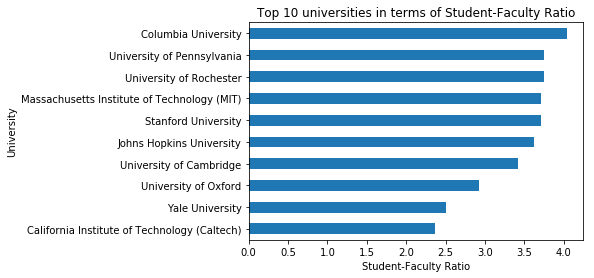

In [13]:
ratio_student_faculty.head(10).plot(kind = 'barh', legend=False)
plt.title('Top 10 universities in terms of Student-Faculty Ratio')
plt.xlabel('Student-Faculty Ratio')
plt.show()

#### (b) Which are the best universities in terms of ratio of international students?

In this part, we find out that in terms of ratio of international students, the best university is **LSE** and we show the top 10 universities with their ratio below. We plot a bar chart of these 10 universities.

Glad to see **EPFL** in the second position!

In [14]:
ratio_inter_total = pd.DataFrame(qs_data['International students']/qs_data['Total students'])
ratio_inter_total.columns = ['Ratio of international students']
ratio_inter_total = ratio_inter_total.sort_values(['Ratio of international students'],ascending = False)
ratio_inter_total.head(10)

,Ratio of international students
University,
London School of Economics and Political Science (LSE),0.691393
Ecole Polytechnique Fédérale de Lausanne (EPFL),0.570047
Imperial College London,0.543567
Maastricht University,0.502533
Carnegie Mellon University,0.478062
UCL (University College London),0.477928
University of St Andrews,0.457955
The University of Melbourne,0.427434
Queen Mary University of London,0.421816


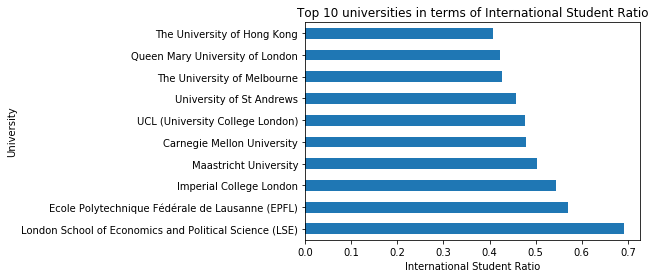

In [15]:
ratio_inter_total.head(10).plot(kind = 'barh', legend = False)
plt.title('Top 10 universities in terms of International Student Ratio')
plt.xlabel('International Student Ratio')
plt.show()

#### (c) Which country has the most universities in Top 200?

In this part, we create the ranking of countries in terms of the number of universities presented in the top 200 and we find out that **the US** has the most universities in the top 200 list. We use a pie chart to show the distribution.

In [16]:
df_country_ranking = qs_data.groupby('Country').count().filter(items = ['QS rank'])
df_country_ranking.columns = ['Number of universities']
df_country_ranking = df_country_ranking.sort_values(['Number of universities'],ascending =  False)
df_country_ranking.head()

,Number of universities
Country,
United States,47
United Kingdom,28
Germany,11
Netherlands,10
Australia,9


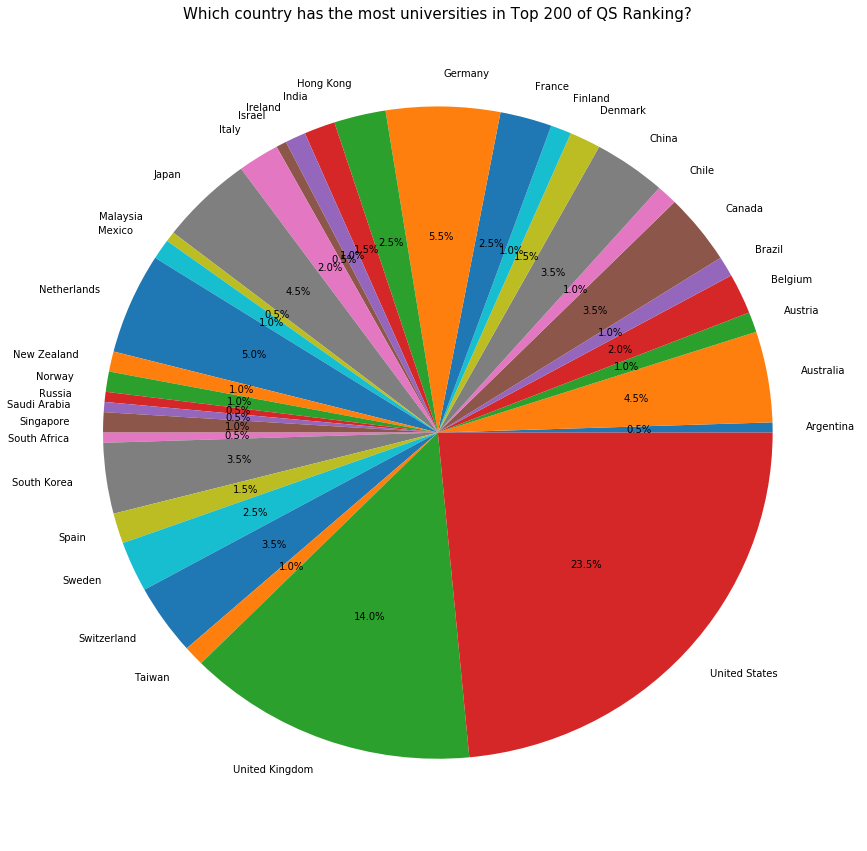

In [17]:
qs_data.groupby('Country').count().filter(items = ['QS rank']).\
                plot(kind='pie',autopct='%.1f%%',subplots=True,figsize=(15,15),legend=False)
plt.title('Which country has the most universities in Top 200 of QS Ranking?', size=15)
plt.ylabel('')
plt.show()

#### (d) Which region has the most universities in Top 200?

In this part, we create the ranking of regions in terms of the number of universities presented in Top 200 and we find out that **Europe** has the most universities in Top 200. We use a pie chart to show the distribution.

In [18]:
df_region_ranking = qs_data.groupby('Region').count().filter(items = ['QS rank'])
df_region_ranking.columns = ['Number of univeristies']
df_region_ranking.sort_values(['Number of univeristies'],ascending =  False)

,Number of univeristies
Region,
Europe,89
North America,54
Asia,38
Oceania,11
Latin America,7
Africa,1


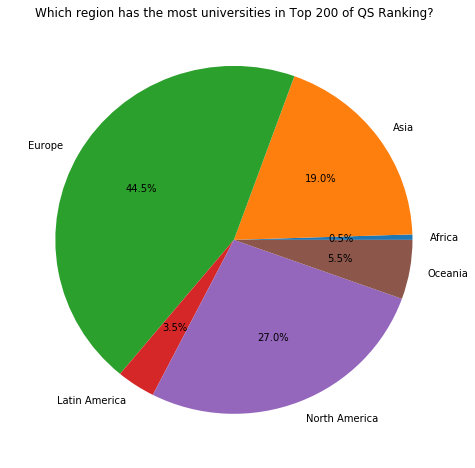

In [19]:
qs_data.groupby('Region').count().filter(items = ['QS rank']).\
            plot(kind='pie',autopct='%.1f%%',subplots=True,figsize=(8,8),legend=False)
plt.title('Which region has the most universities in Top 200 of QS Ranking?', size=12)
plt.ylabel('')
plt.show()

#### (e) Extra analysis: Which is the best university for each country?

In this part, we create a DataFrame to show the best university of each country from the Top 200 list.

In [20]:
df_best_uni_by_country = qs_data.filter(items = ['Country','QS rank'])
df_best_uni_by_country = df_best_uni_by_country.reset_index()
df_best_uni_by_country = df_best_uni_by_country.sort_values(['QS rank'],ascending = True).groupby(['Country']).first()
df_best_uni_by_country.sort_values(['QS rank'])

,University,QS rank
Country,,
United States,Massachusetts Institute of Technology (MIT),1
United Kingdom,University of Cambridge,5
Switzerland,ETH Zurich - Swiss Federal Institute of Techno...,10
Singapore,"Nanyang Technological University, Singapore (NTU)",11
Australia,The Australian National University,20
China,Tsinghua University,25
Hong Kong,The University of Hong Kong,26
Japan,The University of Tokyo,28
Canada,University of Toronto,31


#### (f) Extra analysis: Which is the best university for each region?

In this part, we create a DataFrame to show the best university of each region from the Top 200 list.

In [21]:
df_best_uni_by_region = qs_data.filter(items = ['Region','QS rank'])
df_best_uni_by_region = df_best_uni_by_region.reset_index()
df_best_uni_by_region = df_best_uni_by_region.sort_values(['QS rank'],ascending = True).groupby(['Region']).first()
df_best_uni_by_region.sort_values(['QS rank'])

,University,QS rank
Region,,
North America,Massachusetts Institute of Technology (MIT),1
Europe,University of Cambridge,5
Asia,"Nanyang Technological University, Singapore (NTU)",11
Oceania,The Australian National University,20
Latin America,Universidad de Buenos Aires (UBA),75
Africa,University of Cape Town,191


## 2. The Times Higher Education World University Rankings 2018

### 2.1 Get data.

In [22]:
URL = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'

In [23]:
r = requests.get(URL)
p = r.json()

In [24]:
times_raw = pd.DataFrame.from_dict(p['data'])

Display all attributes' names.

In [25]:
times_raw.columns

Index(['aliases', 'location', 'member_level', 'name', 'nid', 'rank',
       'rank_order', 'record_type', 'scores_citations',
       'scores_citations_rank', 'scores_industry_income',
       'scores_industry_income_rank', 'scores_international_outlook',
       'scores_international_outlook_rank', 'scores_overall',
       'scores_overall_rank', 'scores_research', 'scores_research_rank',
       'scores_teaching', 'scores_teaching_rank', 'stats_female_male_ratio',
       'stats_number_students', 'stats_pc_intl_students',
       'stats_student_staff_ratio', 'subjects_offered', 'url'],
      dtype='object')

Choose the top 200 universities with attributes that we need for analysis.

In [26]:
times_data = times_raw[0:200][['name','rank','location','stats_number_students', 
                            'stats_pc_intl_students', 'stats_student_staff_ratio']]

Some necessary data cleaning work.

In [27]:
# Use only integer for rankings e.g. "=20" -> "20"
rank_int = times_data['rank'].str.replace('=','').astype(int)
times_data['rank'] = rank_int
# Remove all commas 
number_int = times_data['stats_number_students'].str.replace(',','').astype(int)
times_data['stats_number_students'] = number_int
# Remove all percent signs
percent_float = times_data['stats_pc_intl_students'].str.strip("%").astype(float)/100;
times_data['stats_pc_intl_students'] = percent_float

times_data['stats_student_staff_ratio'] = times_data['stats_student_staff_ratio'].astype(float)

Make the columns readable.

In [28]:
times_data.rename(columns = {'name':'University','location':'Country','rank':'Times rank',
                             'stats_number_students':'Total students',
                             'stats_pc_intl_students':'% of international students',
                             'stats_student_staff_ratio':'Student staff ratio'}, inplace = True)

In [29]:
times_data = times_data.set_index(['University'])

In [30]:
times_data.head()

,Times rank,Country,Total students,% of international students,Student staff ratio
University,,,,,
University of Oxford,1,United Kingdom,20409,0.38,11.2
University of Cambridge,2,United Kingdom,18389,0.35,10.9
California Institute of Technology,3,United States,2209,0.27,6.5
Stanford University,3,United States,15845,0.22,7.5
Massachusetts Institute of Technology,5,United States,11177,0.34,8.7


### 2.2 Analyze data

#### (a) Which are the best universities in term of ratio between faculty members and students?

In the Times rankings, we have ratio between students and staff instead of ratio between staff and students. **The smaller the *student staff ratio* is, the better the university is.**

In this part, we find out that the best university in terms of ratio between faculty members and students is **Vanderbilt University**. 

But where is the **Caltech**, which is the top in pervious analysis of QS rankings? In Times rankings, Caltech is not in the top 10 in term of student-faculty ratio.

In [31]:
times_student_staff = times_data.sort_values(['Student staff ratio'],ascending = True)['Student staff ratio']
times_student_staff = pd.DataFrame(times_student_staff)
times_student_staff.head(10)

,Student staff ratio
University,
Vanderbilt University,3.3
University of Copenhagen,4.1
Johns Hopkins University,4.3
Yale University,4.3
University of Rochester,4.3
Emory University,4.4
Duke University,4.5
École Polytechnique,5.1
Scuola Normale Superiore di Pisa,5.2


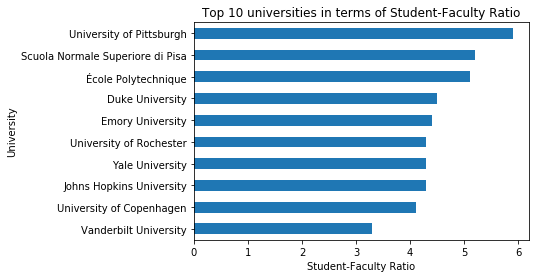

In [32]:
times_student_staff.head(10).plot(kind='barh', legend=False)
plt.title('Top 10 universities in terms of Student-Faculty Ratio')
plt.xlabel('Student-Faculty Ratio')
plt.show()

#### (b) Which are the best universities in term of ratio of international students?

In this part, we find out that the best university in terms of ratio of international students is **London School of Economics and Political Science**. Remember? It's the same result as that we get from the pervious analysis of QS rankings! 

And, glad to see **EPFL** in top again!

In [33]:
times_inter_stud = times_data.sort_values(['% of international students'],ascending = False)['% of international students']
times_inter_stud = pd.DataFrame(times_inter_stud)
times_inter_stud.head(10)

,% of international students
University,
London School of Economics and Political Science,0.71
University of Luxembourg,0.57
École Polytechnique Fédérale de Lausanne,0.55
Imperial College London,0.55
Maastricht University,0.50
University College London,0.49
University of St Andrews,0.48
Carnegie Mellon University,0.45
Queen Mary University of London,0.45


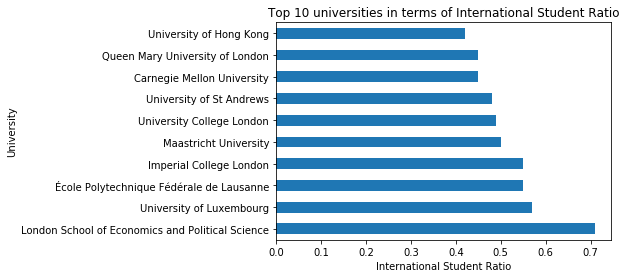

In [34]:
times_inter_stud.head(10).plot(kind='barh', legend=False)
plt.title('Top 10 universities in terms of International Student Ratio')
plt.xlabel('International Student Ratio')
plt.show()

#### (c) Which country has the most universities in Top 200?


In this part, we create the ranking of countries in terms of the number of universities presented in the top 200 and we find out that **the US** has the most universities in the top 200 list. If my memory is right, it's the same result as that of our pervious analysis of QS rankings.

We use a pie chart to show the distribution.

In [35]:
times_country_ranking = times_data.groupby('Country').count().filter(items = ['Times rank'])
times_country_ranking.columns = ['Number of universities']
times_country_ranking = times_country_ranking.sort_values(['Number of universities'],ascending =  False)
times_country_ranking.head()

,Number of universities
Country,
United States,62
United Kingdom,31
Germany,20
Netherlands,13
Australia,8


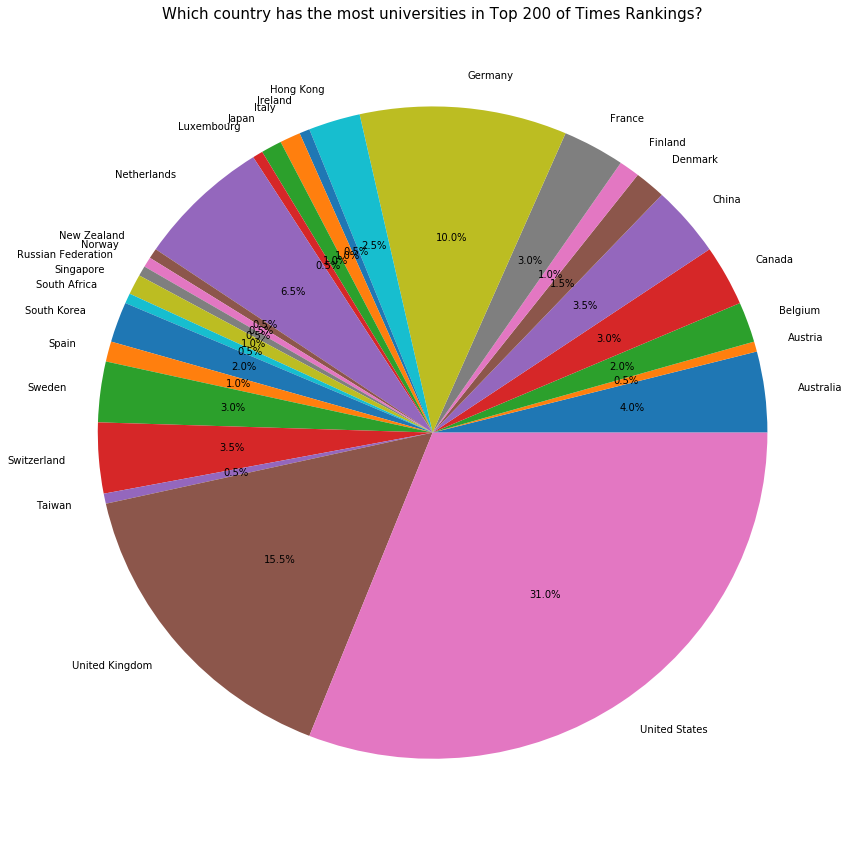

In [36]:
times_data.groupby('Country').count().filter(items = ['Times rank']).\
                plot(kind='pie',autopct='%.1f%%',subplots=True,figsize=(15,15),legend=False)
plt.title('Which country has the most universities in Top 200 of Times Rankings?', size=15)
plt.ylabel('')
plt.show()

#### (d) Which region has the most universities in Top 200?

In this part, we create the ranking of regions in terms of the number of universities presented in Top 200 and we find out that **Europe** has the most universities in Top 200. Also, same as pervious analysis of QS rankings.

We use a pie chart to show the distribution.

Notice that we don't hava attribute *region* in the Times rankings, so we get the map from the QS rankings and do some minor change.

In [37]:
# get the map from QS rankings
df_country_region = qs_data.reset_index()[['Country','Region']].drop_duplicates()
df_country_region = df_country_region.set_index('Country')
# make some minor change
df_country_region.loc['Russian Federation'] = 'Europe'
df_country_region.loc['Luxembourg'] = 'Europe'

In [38]:
times_region_ranking = times_country_ranking.merge(df_country_region,left_index=True,right_index=True,how='left')

In [39]:
times_region_ranking = times_region_ranking.reset_index()[['Region','Number of universities']]
times_region_ranking = times_region_ranking.groupby(['Region']).sum()
times_region_ranking = times_region_ranking.sort_values(['Number of universities'], ascending=False)
times_region_ranking

,Number of universities
Region,
Europe,101
North America,68
Asia,21
Oceania,9
Africa,1


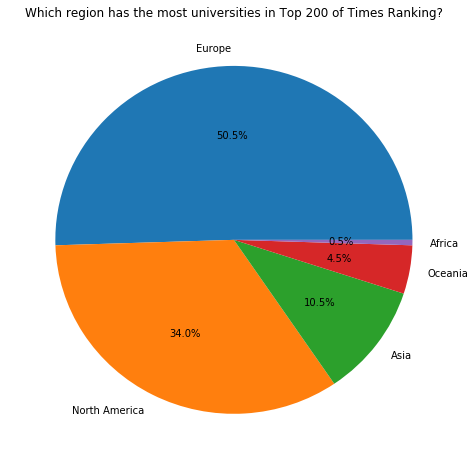

In [40]:
times_region_ranking.plot(kind='pie',autopct='%.1f%%',subplots=True,figsize=(8,8),legend=False)
plt.title('Which region has the most universities in Top 200 of Times Ranking?', size=12)
plt.ylabel('')
plt.show()

## 3. Merge the two DataFrames together

**Strategy**: 

- Remove "( ... )" and "The ..." in the names of universities.
- Find probably best matches between two rankings.
- See if we made some mismatches.
- Merge for the first time, see again if we failed to make matches.
- Re-merge.
- We get totally 160 universites finally.

**Libraries**:

- **re - Regular expression operations**: This module provides regular expression matching operations. For detailed explanation of regular expressions, consult https://docs.python.org/3.6/library/re.html.
- **difflib**: This module provides classes and functions for comparing sequences. For detailed explanation about this library, consult https://docs.python.org/3.6/library/difflib.html.


In [41]:
import re
import difflib

Make copies of original data.

In [42]:
qs_data_copy = qs_data.reset_index().copy()
times_data_copy = times_data.reset_index().copy()

Times uses 'Russian Federation' instead of 'Russia'. We need to change it in order to make two rankings use the same country names.

In [43]:
times_data_copy = times_data_copy.replace('Russian Federation','Russia')

First of all, remove all "( ... )" and "The ..." in the Universities's names in the QS rankings.


`re.sub(pattern, repl, string, count=0, flags=0)`: 

Return the string obtained by replacing the leftmost non-overlapping occurrences of *pattern* in *string* by the replacement *repl*. If the pattern isn’t found, string is returned unchanged.`

In [44]:
qs_uni_list = []
qs_uni_list = qs_data_copy['University'].values
for i in range(len(qs_uni_list)):
    if qs_uni_list[i].startswith('The '):
        uni_change = qs_uni_list[i].replace('The ','')
        qs_uni_list.itemset(i, uni_change)
    # re.sub: replace all matches of '\s+\(.*\)' with ''.
    # '\s' matches whitespace, '\s+' mathches one or more spaces
    # '\(' and '\)' match '(' and ')'
    # '.*' means greedy matches
    uni_change = re.sub(r'\s+\(.*\)','',qs_uni_list[i])
    qs_uni_list.itemset(i, uni_change)

In [45]:
qs_data_copy = qs_data_copy.drop('University',axis=1)
qs_data_copy['University'] = qs_uni_list

Secondly, find all possible matches of names of universities in QS rankings from Times rankings. 

Use the method `difflib.get_close_matches` with the cutoff probablity 0.8 first to find fuzzy matches. Then, check if the matches have same country. And also with the method `difflib.SequenceMatcher(...).ratio()` to determine the similarity of the matches, if the probablities are less than 99%, print it out and recheck.

`difflib.get_close_matches(word, possibilities, n=3, cutoff=0.6)`: 

Return a list of the best “good enough” matches. *word* is a sequence for which close matches are desired, and *possibilities* is a list of sequences against which to match *word*. Optional argument *cutoff* (default 0.6) is a float in the range [0, 1]. Possibilities that don’t score at least that similar to word are ignored. The best (no more than n) matches among the possibilities are returned in a list, sorted by similarity score, **most similar first**.

`difflib.SequenceMatcher(isjunk=None, a='', b='', autojunk=True)`:

This is a flexible class for comparing pairs of sequences of any type, so long as the sequence elements are hashable. And in its constructor, the optional arguments a and b are sequences to be compared; both default to empty strings. 

`difflib.SequenceMatcher(...).ratio()`: Return a measure of the sequences’ similarity as a float in the range [0, 1].


In [46]:
uni_map1 = {}
for uni, country in qs_data_copy[['University','Country']].values:
    # use cutoff possiblity as 0.8
    uni_match = difflib.get_close_matches(uni, times_data_copy['University'], cutoff=0.8)
    if uni_match == []:
        uni_map1[uni] = uni
    # if the country doesn't match, then it's a wrong match
    elif country != times_data_copy[times_data_copy.University == uni_match[0]]['Country'].values: 
        uni_map1[uni] = uni 
    else:
        uni_map1[uni] = uni_match[0]
        # if the similarity between two universities' names is not 99%
        # print it and recheck
        if difflib.SequenceMatcher(None,uni,uni_match[0]).ratio() < 0.99:
            print('MATCH ? :\n{}\n{}\n'.format(uni, uni_match[0]))

MATCH ? :
ETH Zurich - Swiss Federal Institute of Technology
ETH Zurich – Swiss Federal Institute of Technology Zurich

MATCH ? :
Ecole Polytechnique Fédérale de Lausanne
École Polytechnique Fédérale de Lausanne

MATCH ? :
King's College London
King’s College London

MATCH ? :
KAIST - Korea Advanced Institute of Science & Technology
Korea Advanced Institute of Science and Technology (KAIST)

MATCH ? :
Ecole Polytechnique
École Polytechnique

MATCH ? :
Pohang University of Science And Technology
Pohang University of Science and Technology

MATCH ? :
University of North Carolina, Chapel Hill
University of North Carolina at Chapel Hill

MATCH ? :
Washington University in St. Louis
Washington University in St Louis

MATCH ? :
KIT, Karlsruhe Institute of Technology
Karlsruhe Institute of Technology

MATCH ? :
Sungkyunkwan University
Sungkyunkwan University (SKKU)

MATCH ? :
Humboldt-Universität zu Berlin
Humboldt University of Berlin

MATCH ? :
Freie Universitaet Berlin
Free University of B

Check the output and correct the wrong matches.

In [47]:
uni_map1['National Tsing Hua University'] = 'National Tsing Hua University'
uni_map1['University College Dublin'] = 'University College Dublin'

Map the matches to QS rankings.

In [48]:
uni_change_list1 = []
uni_change_list1 =  qs_data_copy['University'].map(uni_map1)
qs_data_copy = qs_data_copy.drop('University',axis=1)
qs_data_copy['University'] = uni_change_list1

Try to merge 2 rankings for the first time.

In [49]:
df_new1 = pd.merge(qs_data_copy, times_data_copy, left_on=['University','Country'], right_on=['University','Country'], how='outer', suffixes=('_qs','_times'))

Find again, if we miss some matches country by country.

If one country has some universities not in QS rankings and also some other universities not in Times rankings, then we may fail to match them. So, print and recheck.

In [50]:
# find all universities that have NaN rankings
df_non = df_new1[df_new1['QS rank'].isnull() | df_new1['Times rank'].isnull()]
# list the countries that have universities not in QS/Times rankings
country_non_qs = df_non[df_non['QS rank'].isnull()].Country.unique()
country_non_times = df_non[df_non['Times rank'].isnull()].Country.unique()
# use a mask to find countries that have some universities not in QS rankings and some not in Times rankings
country_non_mask = []
for c in df_non['Country']:
    if c in country_non_qs and c in country_non_times:
        country_non_mask.append(True)
    else:
        country_non_mask.append(False)
df_non2 = df_non[country_non_mask]
# print the result and check again
df_non2[['University','Country','QS rank','Times rank']].sort_values(['Country','QS rank'])

,University,Country,QS rank,Times rank
181,Vrije Universiteit Brussel,Belgium,182.0,NaN
237,Université Libre de Bruxelles,Belgium,NaN,175.0
42,"Ecole normale supérieure, Paris",France,43.0,NaN
130,Université Pierre et Marie Curie,France,131.0,NaN
176,CentraleSupélec,France,177.0,NaN
205,Paris Sciences et Lettres – PSL Research Unive...,France,NaN,72.0
214,Pierre and Marie Curie University,France,NaN,123.0
239,Paris-Sud University,France,NaN,181.0
246,Paris-Sorbonne University – Paris 4,France,NaN,196.0
65,Ludwig-Maximilians-Universität München,Germany,66.0,NaN


Check the output and create a map for matches we failed to find before.

In [51]:
uni_map2 = {}
for uni in qs_data_copy['University']:
    uni_map2[uni] = uni
    
uni_map2['Université Pierre et Marie Curie'] = 'Pierre and Marie Curie University'

# Universities in Germany
uni_map2['Ludwig-Maximilians-Universität München'] = 'LMU Munich'
uni_map2['Ruprecht-Karls-Universität Heidelberg'] = 'Heidelberg University'
uni_map2['Eberhard Karls Universität Tübingen'] = 'University of Tübingen'
uni_map2['Albert-Ludwigs-Universitaet Freiburg'] = 'University of Freiburg'
uni_map2['Trinity College Dublin, The University of Dublin'] = 'Trinity College Dublin'

uni_map2['Scuola Superiore Sant\'Anna Pisa di Studi Universitari e di Perfezionamento'] = 'Scuola Superiore Sant’Anna'

uni_map2['Wageningen University'] = 'Wageningen University & Research'

uni_map2['Universitat Autònoma de Barcelona'] = 'Autonomous University of Barcelona'

uni_map2['UCL'] = 'University College London'

Map again.

In [52]:
uni_change_list2 = []
uni_change_list2 =  qs_data_copy['University'].map(uni_map2)
qs_data_copy = qs_data_copy.drop('University',axis=1)
qs_data_copy['University'] = uni_change_list2

Merge the 2 rankings.

In [53]:
df_new2 = pd.merge(qs_data_copy, times_data_copy, left_on=['University','Country'], right_on=['University','Country'], how='outer', suffixes=('_qs','_times'))

**merge_data**     : Keep only universities in both rankings

In [54]:
merge_data = df_new2.dropna()
merge_data = merge_data.set_index('University')

In [55]:
merge_data['QS rank']                       = merge_data['QS rank'].astype(int)
merge_data['Total faculty members']         = merge_data['Total faculty members'].astype(int)
merge_data['International faculty members'] = merge_data['International faculty members'].astype(int)
merge_data['Total students_qs']             = merge_data['Total students_qs'].astype(int)
merge_data['Total faculty members']         = merge_data['Total faculty members'].astype(int)
merge_data['International students']        = merge_data['International students'].astype(int)
merge_data['Times rank']                    = merge_data['Times rank'].astype(int)
merge_data['Total students_times']          = merge_data['Total students_times'].astype(int)
merge_data['% of international students']   = merge_data['% of international students'].astype(float)
merge_data['Student staff ratio']           = merge_data['Student staff ratio'].astype(float)

Create some attributes using the data already in two rankings in order to make two rankings have as more similar attributes as possible.

In [56]:
merge_data['International students_times'] = merge_data['Total students_times']*merge_data['% of international students']
merge_data['International students_times'] = merge_data['International students_times'].astype(int)

In [57]:
merge_data['Total faculty members_times'] = merge_data['Total students_times']/merge_data['Student staff ratio']
merge_data['Total faculty members_times'] = merge_data['Total faculty members_times'].astype(int)

In [58]:
merge_data['% of international students_qs'] = merge_data['International students']/merge_data['Total students_qs']
merge_data['% of international students_qs'] = merge_data['% of international students_qs'].map('{:,.2f}'.format).astype(float)

In [59]:
merge_data['% of international faculty_qs'] = merge_data['International faculty members']/merge_data['Total faculty members']
merge_data['% of international faculty_qs'] = merge_data['% of international faculty_qs'].map('{:,.2f}'.format).astype(float)

In [60]:
merge_data['Student stafff ratio_qs'] = merge_data['Total students_qs']/merge_data['Total faculty members']
merge_data['Student stafff ratio_qs'] = merge_data['Student stafff ratio_qs'].map('{:,.1f}'.format).astype(float)

Use hierachical columns.

In [61]:
merge_data = merge_data[['Country','Region',\
                         'QS rank','Total faculty members','International faculty members','% of international faculty_qs',\
                         'Total students_qs','International students','% of international students_qs','Student stafff ratio_qs',\
                         'Times rank','Total faculty members_times','Total students_times',\
                         'International students_times','% of international students','Student staff ratio']]

In [62]:
merge_data.columns = [['Country','Region',
                       'QS','QS','QS','QS','QS','QS','QS','QS',
                       'Times','Times','Times','Times','Times','Times'],
                      ['','',
                       'Rank','Total staff','Inter staff','% of inter staff','Total stu','Inter stu','% of inter stu','Stu/Staff',
                       'Rank','Total staff','Total stu','Inter stu','% of inter stu','Stu/Staff']]

In [63]:
merge_data.head()

Country         Region   QS  \
                                                                     Rank   
University                                                                  
Massachusetts Institute of Technology   United States  North America    1   
Stanford University                     United States  North America    2   
Harvard University                      United States  North America    3   
California Institute of Technology      United States  North America    4   
University of Cambridge                United Kingdom         Europe    5   

                                                               \
                                      Total staff Inter staff   
University                                                      
Massachusetts Institute of Technology        2982        1679   
Stanford University                          4285        2042   
Harvard University                           4350        1311   
California Institute of Technology            953         350   
University of Cambridge                      5490        2278   

                                                                            \
                                      % of inter staff Total stu Inter stu   
University                                                                   
Massachusetts Institute of Technology             0.56     11067      3717   
Stanford University                               0.48     15878      3611   
Harvard University                                0.30     22429      5266   
California Institute of Technology                0.37      2255       647   
University of Cambridge                           0.41     18770      6699   

                                                               Times  \
                                      % of inter stu Stu/Staff  Rank   
University                                                             
Massachusetts Institute of Technology           0.34       3.7     5   
Stanford University                             0.23       3.7     3   
Harvard University                              0.23       5.2     6   
California Institute of Technology              0.29       2.4     3   
University of Cambridge                         0.36       3.4     2   

                                                                       \
                                      Total staff Total stu Inter stu   
University                                                              
Massachusetts Institute of Technology        1284     11177      3800   
Stanford University                          2112     15845      3485   
Harvard University                           2283     20326      5284   
California Institute of Technology            339      2209       596   
University of Cambridge                      1687     18389      6436   

                                                                
                                      % of inter stu Stu/Staff  
University                                                      
Massachusetts Institute of Technology           0.34       8.7  
Stanford University                             0.22       7.5  
Harvard University                              0.26       8.9  
California Institute of Technology              0.27       6.5  
University of Cambridge                         0.35      10.9

In [64]:
merge_data.shape

(160, 16)

## 4. Exploratory analysis

### 4.1 Find the correlations

In this part, we only consider those **universities that are in both rankings**.

Get the correlation matrix of each column.

In [65]:
corr_merge = merge_data.corr()

#### (a) Between the rank

First, it's interesting to see, if there is some correlation between the ranks.

In [66]:
corr_rank = corr_merge['QS','Rank']['Times','Rank']
print("The correlation between 2 rankings is {:.4f}.".format(corr_rank))

The correlation between 2 rankings is 0.6911.


The corrleation is *nearly 0.7*, which indicates that the results of QS rankings and Times rankings **have some kind of similarity**. In other words, if you find a university that has high rank in both rankings, then this university is very likely to be a wonderful choice for you.

#### (b) Between the data

We notice that for each university, there ara some same attributes used by 2 rankings, like `Total Students`, `International Students`and `Total Faculty Members/Staff`. However, the values of these attributes are not the same. We want to see if these attributes have some kind of correlations. Generally speking, if it's the same attribute for the same university, then the correlation should be around 1.

In [67]:
corr_stu = corr_merge['QS','Total stu']['Times','Total stu']
corr_inter_stu = corr_merge['QS','Inter stu']['Times','Inter stu']
print("The correlation between the number of students of 2 rankings is {:.4f}.".format(corr_stu))
print("The correlation between the number of international students of 2 rankings is {:.4f}.".format(corr_inter_stu))

The correlation between the number of students of 2 rankings is 0.9474.
The correlation between the number of international students of 2 rankings is 0.8913.


In [68]:
corr_staff = corr_merge['QS','Total staff']['Times','Total staff']
print("The correlation between the number of staff of 2 rankings is {:.4f}.".format(corr_staff))

The correlation between the number of staff of 2 rankings is 0.6916.


As shown above, corrleation of `Total Students`, `International Students` between two rankings are near 1, which indicates that QS/Times rankings may get the data about the number of students in a similar way. 

On the other hand, the corrleation of `Total Faculty Members/Staff` is not very close to 1. One of the possible reasons is, in this homework, we consider the faculty members the same as the staff, and that may be not true. QS and Times Rankings may have different definition of *Faculty Members* or *Staff*, or maybe the two rankings collect data from different sources.

#### (c) International dimension

Speaking of international dimension of one univerisity, the percentages of international staff and studens always matter. Below, we calculate the correlation between these two attributes with the data from QS Rankings.

In [69]:
corr_inter_qs = corr_merge['QS','% of inter staff']['QS','% of inter stu']
print("The data are from QS rankings:")
print("The correlation between number of international staff and students is {:.4f}.".format(corr_inter_qs))

The data are from QS rankings:
The correlation between number of international staff and students is 0.6613.


The correlation is above 0.66 and it is high. So, if a university has high percentage of international staff, the percentage of international students of this university is likely to be high also.

### 4.2 Find the difference

#### (a) What matters in QS/Times Rankings?

We don't know exactly how QS and Times make the Rankings. Above, we have found out that the results of the two rankings have some kind of similarity. Maybe, we could also find the correlation between rank and other attributes to find if there exists some strong dependencies.

In [70]:
corr_qs = pd.DataFrame(corr_merge['QS','Rank']['QS'])
corr_qs.T

,,Rank,Total staff,Inter staff,% of inter staff,Total stu,Inter stu,% of inter stu,Stu/Staff
QS,Rank,1.0,-0.357825,-0.508623,-0.36101,-0.014387,-0.251548,-0.321335,0.340823


+ Almost attributes, except `Stu/Staff` in the DataFrames have negative correlation with `Rank`. Note that high rank means small number in the `Rank` column, so negative correlation actually indicates some dependencies. As for `Stu/Staff`, the smaller the ratio is, the smaller the number in rank is, which also sounds reasonable.
+ One interesting fact is the correlation between `Rank` and `Inter staff` is more negative than that for `% of inter staff`. In other words, the QS rankings consider more about the number of international staff one university has, other than the percentage of international staff.
+ As for `Total stu`, the correlation is close to 0. In my opinion, it cannot indicate that the rank and the number of students have weak dependency. Because when we calculate correlation, we just use the values directly. But, we probably need to somehow converse the number of students ,may not linearly, to some other values for total rank calculation.

In [71]:
corr_times = pd.DataFrame(corr_merge['Times','Rank']['Times'])
corr_times.T

,,Rank,Total staff,Total stu,Inter stu,% of inter stu,Stu/Staff
Times,Rank,1.0,-0.226466,-0.151882,-0.282192,-0.198244,0.05386


+ For Times Rankings, things are roughly the same.
+ One difference is the correlation between `Rank` and `Stu/Staff` is not as high as that in QS Rankings, which showes that Times may put less importance on student-faculty ratio.

#### (b) Is there any "bias" in QS / Times Rankings? 

In order to compare 2 rankings, we use pie charts to show region distributions of Top 10, Top 20, Top 50, Top 100 and Top 200 in the QS/Times rankings. From the region distributions, we want to see if there is any **"region-perference"** inside QS/Times rankings.

In this part, we use **data from two rankings DataFrames, instead of the merged DataFrame** because we want to see if there is some perference so we want to know not only the similarity but also the difference between 2 rankings.

Get data from 2 DataFrames we use in Question 1 and 2. Remember to map the country to region for the Times rankings using the map we create.

In [72]:
qs_rank = qs_data[['QS rank','Country', 'Region']]
times_rank = times_data[['Times rank','Country']].merge(df_country_region,left_on='Country',right_index=True,how='left')

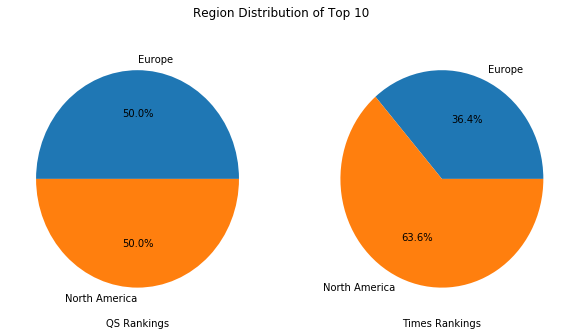

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
qs_top10_count = qs_rank[qs_rank['QS rank'] <= 10].groupby('Region').count()
qs_top10_count['QS rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False,
                               title='Region Distribution of Top 10')
plt.xlabel('QS Rankings')
plt.ylabel('')

plt.subplot(1,2,2)
times_top10_count = times_rank[times_rank['Times rank'] <= 10].groupby('Region').count()
times_top10_count['Times rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False)
plt.xlabel('Times Rankings')
plt.ylabel('')

plt.show()

- In Top 10, For both two rankings, North America and Europe domain the TOP 10 universities. In QS, it's a tie for North America and Europe. However, in Times, North America takes over nearly two thirds.

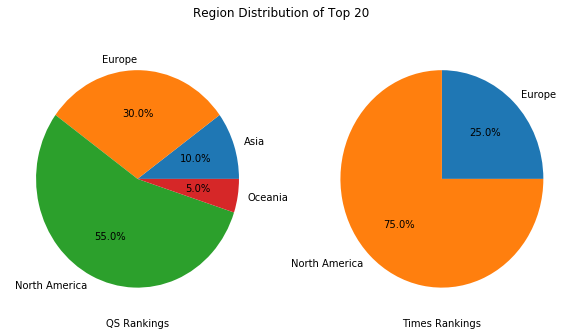

In [74]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
qs_top20_count = qs_rank[qs_rank['QS rank'] <= 20].groupby('Region').count()
qs_top20_count['QS rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False,
                              title='Region Distribution of Top 20')
plt.xlabel('QS Rankings')
plt.ylabel('')

plt.subplot(1,2,2)
times_top20_count = times_rank[times_rank['Times rank'] <= 20].groupby('Region').count()
times_top20_count['Times rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False)
plt.xlabel('Times Rankings')
plt.ylabel('')

plt.show()

- In Top 20, for Times Rankings, it's also the same as above with, to be specific, 75% from North America. But for QS Rankings, there is an increasing in Asia and Oceania.

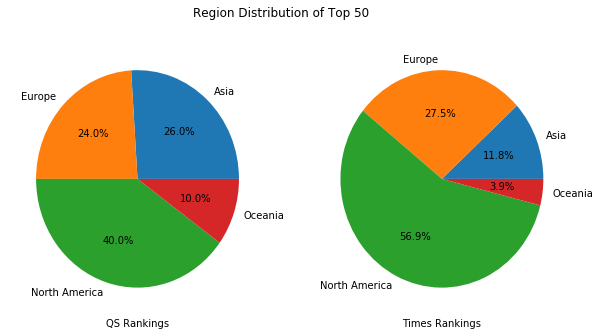

In [75]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
qs_top50_count = qs_rank[qs_rank['QS rank'] <= 50].groupby('Region').count()
qs_top50_count['QS rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False,
                              title='Region Distribution of Top 50')
plt.xlabel('QS Rankings')
plt.ylabel('')

plt.subplot(1,2,2)
times_top50_count = times_rank[times_rank['Times rank'] <= 50].groupby('Region').count()
times_top50_count['Times rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False)
plt.xlabel('Times Rankings')
plt.ylabel('')

plt.show()

- In Top 50, there are more univerities from Asia and Oceania for both rankings. And in QS, Asia makes more than 26% and is even a little more than Europe.

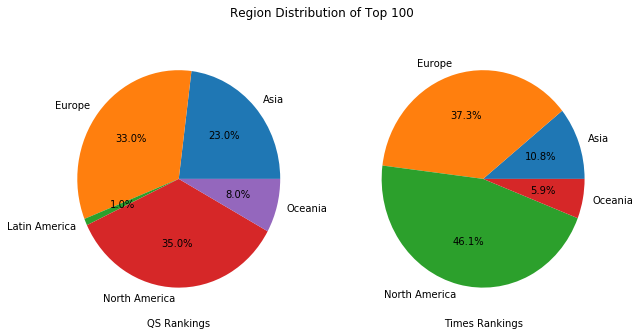

In [76]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
qs_top100_count = qs_rank[qs_rank['QS rank'] <= 100].groupby('Region').count()
qs_top100_count['QS rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False,
                              title='Region Distribution of Top 100')
plt.xlabel('QS Rankings')
plt.ylabel('')

plt.subplot(1,2,2)
times_top100_count = times_rank[times_rank['Times rank'] <= 100].groupby('Region').count()
times_top100_count['Times rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False)
plt.xlabel('Times Rankings')
plt.ylabel('')

plt.show()

- In Top 100, the two rankings have more similar distribution than above. And there is a steady growth for Europe in both rankings. We notice Latin America for the first time in QS Rankings.

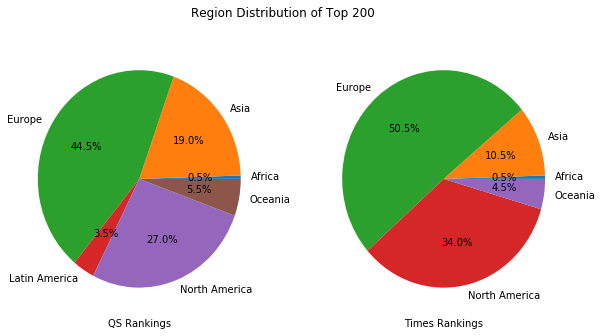

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
qs_top200_count = qs_rank.groupby('Region').count()
qs_top200_count['QS rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False,
                              title='Region Distribution of Top 200')
plt.xlabel('QS Rankings')
plt.ylabel('')

plt.subplot(1,2,2)
times_top200_count = times_rank.groupby('Region').count()
times_top200_count['Times rank'].plot(kind='pie',autopct='%.1f%%',subplots=True,legend=False)
plt.xlabel('Times Rankings')
plt.ylabel('')

plt.show()

- In Top 200, nearly half are from Europe for both rankings. And Africa and Oceania have similar "performance" in both rankings, too. Asia is better in QS Rankings.

**To sum up:**

- There exists some 'region-preference' inside QS/Times Rankings. 
- For the "Top's Top"(maybe Top 20) universities, Times prefers North America most and then Europe. On the hand, QS gives high score for Aisa and Oceania also.
- Only QS puts universities from Latin America into Top 200.
- Both rankings give Africa a chance.

## 5. Find the best university

### Method 1

The first simple method to find the best university is to calculate the average rank of these two rankings. 

First of all, we assumed that one university can be considered as the best one if and only if it ranks top 10 in both rankings. Thus, we collected all the possible universities which is top 10 in both rankings and put them in a temporary dataframe with their ranks as columns. Then, we calculated the average rank of these universites and sorted the dataframes by the average rank. 

From the result below, we found that **the best university is Standford University** since its average rank is the smallest.

In [78]:
temp = merge_data[(merge_data['QS','Rank'] <= 10) & (merge_data['Times','Rank'] <= 10)].filter(items = [('QS','Rank'),('Times','Rank')])
temp = pd.DataFrame((temp['QS','Rank'] + temp['Times','Rank'])/2)
temp.columns = ['Avg rank']
temp.sort_values('Avg rank',ascending = True)

,Avg rank
University,
Stanford University,2.5
Massachusetts Institute of Technology,3.0
California Institute of Technology,3.5
University of Cambridge,3.5
University of Oxford,3.5
Harvard University,4.5
Imperial College London,8.0
University of Chicago,9.0
ETH Zurich – Swiss Federal Institute of Technology Zurich,10.0


### Method 2

The second method is more complicated since we added a weight for each attribute in order to calculate a new rank for each university. As before, we assumed that **one university can be considered as the best one if and only if it ranks top 10 in both rankings**. 

We chose 4 attribute which presented in both rankings: `Rank`, `Total Staff`, `Total Students` and `International Students` and the weight is distributed as follow: **0.35, 0.05, 0.05, 0.05** so that the sum of weights of these 8 attributes equals to 1.

$Score = Rank_{QS} * 0.35 + Faculty_{QS} * 0.05 + Student_{QS} * 0.05 + InterStud_{QS} * 0.05 + Rank_{Times} * 0.35 + Faculty_{Times} * 0.05 + Student_{Times} * 0.05 + InterStud_{Times} * 0.05$


Higher the rank is, smaller the number is. So:
$$Rank = 11-Rank_{Original}$$


And also, we normalize all numbers for faculty members and students. For example:
$$Faculty = \frac{Faculty_{Original}}{Faculty_{Max}} * 10$$


So, the *Score* is between 1-10.

In this way, **the best university is also Stanford University**.

In [79]:
columns = ['Rank','Total staff','Total stu','Inter stu']

In [80]:
score_ratio = [0.35,0.05,0.05,0.05]

In this part, we calculate the score of each attribute for the top 10 **QS** universities.

In [81]:
qs_10 = merge_data[merge_data['QS','Rank'] <= 10]['QS']
df_qs = pd.DataFrame()
df_qs['Rank']        = (11 - qs_10['Rank']) * 0.35
df_qs['Total staff'] = qs_10['Total staff']/qs_10['Total staff'].max()*10 * 0.05
df_qs['Total stu']   = qs_10['Total stu']/qs_10['Total stu'].max()*10     * 0.05
df_qs['Inter stu']   = qs_10['Inter stu']/qs_10['Inter stu'].max()*10     * 0.05
df_qs

,Rank,Total staff,Total stu,Inter stu
University,,,,
Massachusetts Institute of Technology,3.50,0.220889,0.178041,0.125118
Stanford University,3.15,0.317407,0.255438,0.121550
Harvard University,2.80,0.322222,0.360827,0.177259
California Institute of Technology,2.45,0.070593,0.036277,0.021779
University of Cambridge,2.10,0.406667,0.301963,0.225495
University of Oxford,1.75,0.500000,0.317246,0.247509
University College London,1.40,0.470000,0.500000,0.500000
Imperial College London,1.05,0.291111,0.258848,0.294399
University of Chicago,0.70,0.181407,0.218098,0.113740


In this part, we calculate the score of each attribute for the top 10 **Times** universities (which actually are 11 universities beacause ETH and UPenn tie for the 10th).

In [82]:
times_10 = merge_data[merge_data['Times','Rank'] <= 10]['Times']
df_times = pd.DataFrame()
df_times['Rank']        = (11 - times_10['Rank']) * 0.35
df_times['Total staff'] = times_10['Total staff']/times_10['Total staff'].max()*10 * 0.05
df_times['Total stu']   = times_10['Total stu']/times_10['Total stu'].max()*10     * 0.05
df_times['Inter stu']   = times_10['Inter stu']/times_10['Inter stu'].max()*10     * 0.05
df_times

,Rank,Total staff,Total stu,Inter stu
University,,,,
Massachusetts Institute of Technology,2.10,0.204981,0.273825,0.217865
Stanford University,2.80,0.337165,0.388187,0.199805
Harvard University,1.75,0.364464,0.497967,0.302947
California Institute of Technology,2.80,0.054119,0.054118,0.034170
University of Cambridge,3.15,0.269317,0.450512,0.368994
University of Oxford,3.50,0.290868,0.500000,0.444616
Imperial College London,1.05,0.221903,0.388481,0.500000
University of Chicago,0.70,0.348180,0.331349,0.193842
ETH Zurich – Swiss Federal Institute of Technology Zurich,0.35,0.210249,0.471189,0.418989


Next, we **add all score together** by merging, and sort the new dataframe.

In [83]:
df_mix = pd.merge(df_qs, df_times, left_index=True, right_index=True, how='inner')

In [84]:
df_mix['Score'] = df_mix.apply(lambda x: x.sum(), axis=1)

In [85]:
df_mix.sort_values('Score',ascending = False).filter(items=['Score'])

,Score
University,
Stanford University,7.569551
University of Oxford,7.550240
University of Cambridge,7.272947
Massachusetts Institute of Technology,6.820718
Harvard University,6.575685
California Institute of Technology,5.521056
Imperial College London,4.054742
University of Chicago,2.786618
ETH Zurich – Swiss Federal Institute of Technology Zurich,2.557260


We can see **Stanford University** tops the list.